In [1]:
import numpy as np
import pygame
from squid_env import trainSquid, opponent


from matplotlib import pyplot as plt
from Q_learing import Q_learning
from Q_learning_train import QLearningTraining

pygame 2.5.2 (SDL 2.28.3, Python 3.9.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:

agent = Q_learning((4, 4, 4, 4, 5, 5, 5, 5, 11, 5, 5), ["LEFT","RIGHT", "DOWN", "UP"])

# 創建環境和 Q-learning 代理
env = trainSquid(level=8)  # 確保設定 render=False 進行訓練

# 初始化訓練類
q_learning_trainer = QLearningTraining(
    agent=agent, 
    env=env, 
    initial_lr=1, 
    gamma=0.99
)

In [3]:
def show(render=True):
    get_point = [0, 0]
    state, reward, terminated, truncated, _ = q_learning_trainer.env.reset()

    reward1p = 0
    reward2p = 0

    while True:
        if (render):
            q_learning_trainer.env.render()
        commands = {"1P" : [q_learning_trainer.agent.step(tuple(state[0]), 0)],  
                    "2P" : [opponent(tuple(state[2]))]}
        

        next_state, reward, terminated, truncated, _ = \
            q_learning_trainer.env.step(commands)
        

        state = next_state#感你娘機掰
        
        get_point[0] += reward[0]
        get_point[1] += reward[1]
        
        reward1p += reward[0]
        reward2p += reward[1]

        if (terminated):
            break
    return int(reward1p > reward2p)


In [4]:
q_learning_trainer.train(episodes=20000, lrDecrease=1000, epsDecrease=1000)

q_learning_trainer.agent.save("AttackOpponent.pickle")

episode: 0, reward: -130.96000000000006
episode: 50, reward: -47.53999999999955
episode: 100, reward: -29.810000000000095
episode: 150, reward: -26.11000000000002
episode: 200, reward: -11.870000000000072
episode: 250, reward: 9.270000000000067
episode: 300, reward: -67.98000000000012
episode: 350, reward: -91.34000000000005
episode: 400, reward: -83.06999999999994
episode: 450, reward: -42.460000000000036
episode: 500, reward: 32.01999999999986
episode: 550, reward: -29.56000000000004
episode: 600, reward: -90.420000000001
episode: 650, reward: 39.60999999999983
episode: 700, reward: -56.869999999999926
episode: 750, reward: -86.0500000000003
episode: 800, reward: -136.24999999999974
episode: 850, reward: -56.679999999999474
episode: 900, reward: -68.4100000000002
episode: 950, reward: -89.41000000000001
episode: 1000, reward: -69.51999999999994
episode: 1050, reward: -70.19000000000065
episode: 1100, reward: -106.5500000000003
episode: 1150, reward: -124.990000000001
episode: 1200, r

KeyboardInterrupt: 

In [5]:

win = 0
n = 500
for i in range(n):
    win += show(render=False)

print(f"{win} : {n - win}")
pygame.quit()

同分延長賽
同分延長賽
268 : 232


episode: 0, reward: -45
episode: 50, reward: -3
episode: 100, reward: 100
episode: 150, reward: 102
episode: 200, reward: 80
episode: 250, reward: 100
episode: 300, reward: 85
episode: 350, reward: 96
episode: 400, reward: 102
episode: 450, reward: 84
episode: 500, reward: 87
episode: 550, reward: 108
episode: 600, reward: 100
episode: 650, reward: 46
episode: 700, reward: 22
episode: 750, reward: 80
episode: 800, reward: 83
episode: 850, reward: 103
episode: 900, reward: 55
episode: 950, reward: 61
episode: 1000, reward: 55
episode: 1050, reward: 100
episode: 1100, reward: 102
episode: 1150, reward: 100
episode: 1200, reward: 101
episode: 1250, reward: 27
episode: 1300, reward: 4
episode: 1350, reward: 87
episode: 1400, reward: 100
episode: 1450, reward: 101
episode: 1500, reward: 101
episode: 1550, reward: 100
episode: 1600, reward: 99
episode: 1650, reward: 101
episode: 1700, reward: 55
同分延長賽
episode: 1750, reward: 102
episode: 1800, reward: 101
episode: 1850, reward: 61
episode: 19

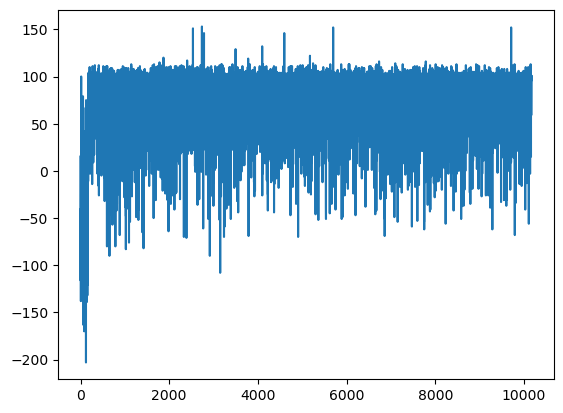

In [5]:
# q_learning_trainer.agent.load("studentModel.pickle")

# q_learning_trainer.train(episodes=10000, epsDecrease=1)

    

In [6]:


win = 0
n = 500
for i in range(n):
    win += show(render=False)

print(f"{win} : {n - win}")
pygame.quit()

77 : 423


In [ ]:
show(render=True)
pygame.quit()

In [ ]:
import pickle
with open("4wayPotential.pickle", "wb") as f:
    pickle.dump(q_learning_trainer.agent.Q_form, f)

In [ ]:
q_learning_trainer.agent.end_shm()